<a href="https://colab.research.google.com/github/aly202012/Teaching/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Binary Classification

In [6]:

import pandas as pd

# load the training dataset
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()
#diabetes.shape
# (2000, 9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [10]:
# هنا يتم الفصل بين المتغيرات وبين الهدف 
# Separate features and labels
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
label = 'Outcome'
X, y = diabetes[features].values, diabetes[label].values
# for n in range(0,10):
# هنا تم التحويل او العرض علي شكل ليست 
for n in range(10):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [2.0, 138.0, 62.0, 35.0, 0.0, 33.6, 0.127, 47.0] 
  Label: 1
Patient 2 
  Features: [0.0, 84.0, 82.0, 31.0, 125.0, 38.2, 0.233, 23.0] 
  Label: 0
Patient 3 
  Features: [0.0, 145.0, 0.0, 0.0, 0.0, 44.2, 0.63, 31.0] 
  Label: 1
Patient 4 
  Features: [0.0, 135.0, 68.0, 42.0, 250.0, 42.3, 0.365, 24.0] 
  Label: 1
Patient 5 
  Features: [1.0, 139.0, 62.0, 41.0, 480.0, 40.7, 0.536, 21.0] 
  Label: 0
Patient 6 
  Features: [0.0, 173.0, 78.0, 32.0, 265.0, 46.5, 1.159, 58.0] 
  Label: 0
Patient 7 
  Features: [4.0, 99.0, 72.0, 17.0, 0.0, 25.6, 0.294, 28.0] 
  Label: 0
Patient 8 
  Features: [8.0, 194.0, 80.0, 0.0, 0.0, 26.1, 0.551, 67.0] 
  Label: 0
Patient 9 
  Features: [2.0, 83.0, 65.0, 28.0, 66.0, 36.8, 0.629, 24.0] 
  Label: 0
Patient 10 
  Features: [2.0, 89.0, 90.0, 30.0, 0.0, 33.5, 0.292, 42.0] 
  Label: 0


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

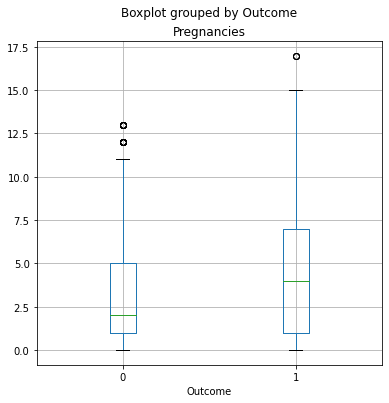

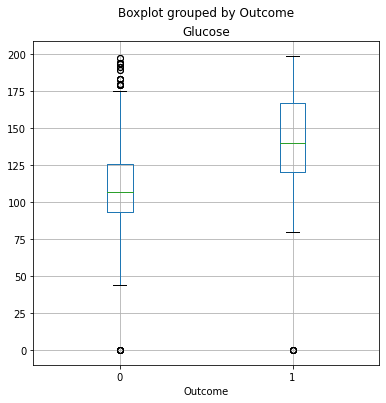

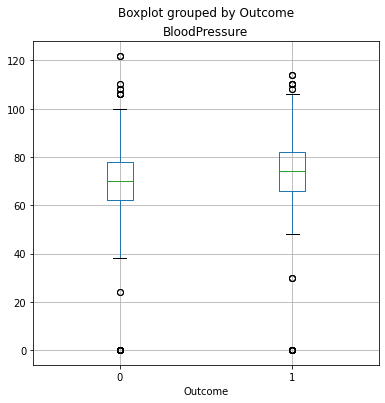

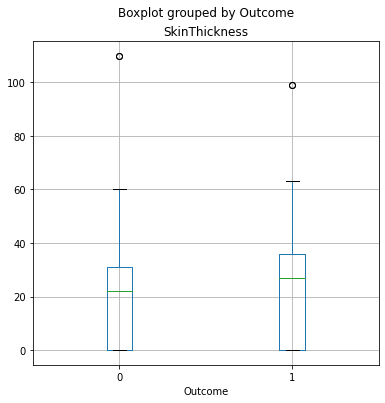

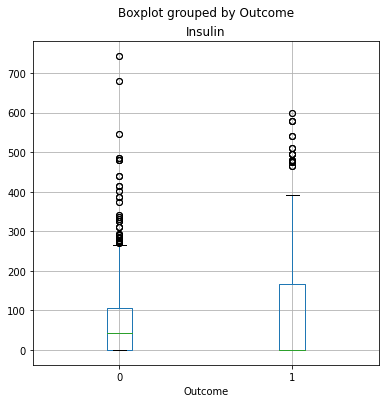

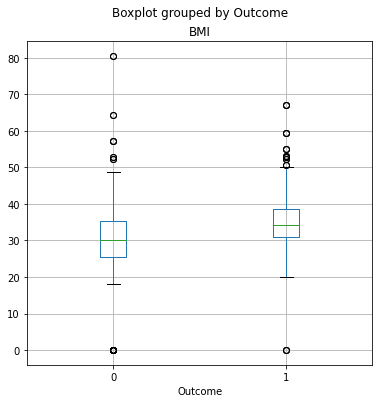

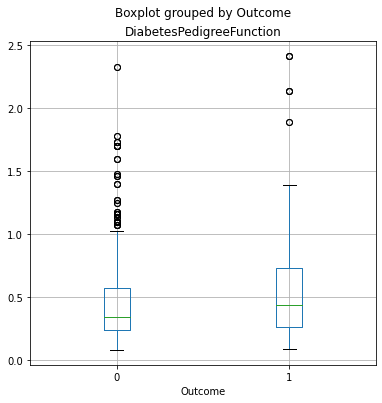

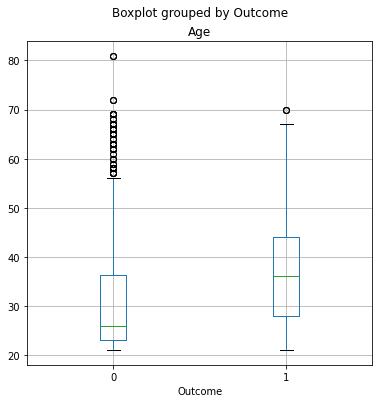

In [13]:
from matplotlib import pyplot as plt
#%matplotlib inline

features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in features:
    diabetes.boxplot(column=col, by='Outcome', figsize=(6,6))
    plt.title(col)
plt.show()

In [14]:
# بدايه تقسيم البيانات 

In [15]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))
# نلاحظ ان عدد الصفوف لدينا يساوي 2000

Training cases: 1400
Test cases: 600


In [16]:
# بدايه تدريب النموذج 

In [17]:

# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [18]:
# بدايه الاختبار للموذج والتي تم الاحتفاظ بها في الاكس تست 
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0
 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 0

In [19]:
# لمقارنه التنبؤات بشكل افضل 
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.7783333333333333


In [20]:
# لحسن الحظ ، هناك بعض المقاييس الأخرى التي تكشف المزيد عن كيفية أداء نموذجنا. يتضمن
# Scikit-Learn القدرة على إنشاء تقرير تصنيف يوفر رؤية أكثر من الدقة الأولية وحدها. 
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

#Precision: Of the predictions the model made for this class, what proportion were correct?
#Recall: Out of all of the instances of this class in the test dataset, how many did the model identify?
#F1-Score: An average metric that takes both precision and recall into account.
#Support: How many instances of this class are there in the test dataset?
#الدقة : ما هي النسبة الصحيحة من التنبؤات التي قدمها النموذج لهذه الفئة؟
# أذكر : من بين جميع مثيلات هذه الفئة في مجموعة بيانات الاختبار ، كم عددًا حددها النموذج؟
#F1- نقاط: مقياس متوسط يأخذ الدقة والاسترجاع في الاعتبار.
# الدعم : كم عدد حالات هذه الفئة الموجودة في مجموعة بيانات الاختبار؟

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       397
           1       0.73      0.55      0.63       203

    accuracy                           0.78       600
   macro avg       0.76      0.72      0.73       600
weighted avg       0.77      0.78      0.77       600



In [21]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.7272727272727273
Overall Recall: 0.5517241379310345


In [22]:
# مصفوفه التشتت

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[355  42]
 [ 91 112]]


In [23]:
# احتمال ان الاجابه صحيحه ما بين خانتين
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.56929266 0.43070734]
 [0.87587148 0.12412852]
 [0.19195568 0.80804432]
 ...
 [0.85500247 0.14499753]
 [0.68629617 0.31370383]
 [0.2741836  0.7258164 ]]


تتمثل إحدى الطرق الشائعة لتقييم المصنف في فحص المعدل الإيجابي الحقيقي (وهو اسم آخر للتذكر) والمعدل الإيجابي الخاطئ لمجموعة من العتبات المحتملة. ثم يتم رسم هذه الأسعار مقابل جميع العتبات الممكنة لتشكيل مخطط يُعرف باسم مخطط خصائص عامل التشغيل المستلم (ROC) ، مثل هذا:
A common way to evaluate a classifier is to examine the true positive rate (which is another name for recall) and the false positive rate for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a received operator characteristic (ROC) chart, like this:

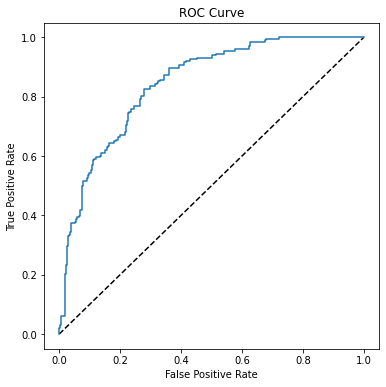

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

المنطقة الواقعة تحت المنحنى (AUC) هي قيمة بين 0 و 1 تحدد الأداء العام للنموذج. كلما كانت هذه القيمة أقرب إلى 1 ، كان النموذج أفضل. مرة أخرى ، يتضمن scikit-Learn وظيفة لحساب هذا المقياس. 

In [25]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8447593403729944


In practice, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it. There's a huge range of preprocessing transformations you can perform to get your data ready for modeling, but we'll limit ourselves to a few common techniques:

Scaling numeric features so they're on the same scale. This prevents features with large values from producing coefficients that disproportionately affect the predictions.
Encoding categorical variables. For example, by using a one hot encoding technique you can create individual binary (true/false) features for each possible category value.

In [26]:
# لرفع الكفاءه للخوارزم يجب عمل معالجه للبيانات بشكل افضل واكثر 

# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline

دعنا نستخدم النموذج الذي تم تدريبه بواسطة خط الأنابيب هذا للتنبؤ بتسميات مجموعة الاختبار الخاصة بنا ، ومقارنة مقاييس الأداء بالنموذج الأساسي الذي أنشأناه سابقًا.


Confusion Matrix:
 [[357  40]
 [ 77 126]] 

Accuracy: 0.805
Overall Precision: 0.7590361445783133
Overall Recall: 0.6206896551724138
AUC: 0.8652082738767355


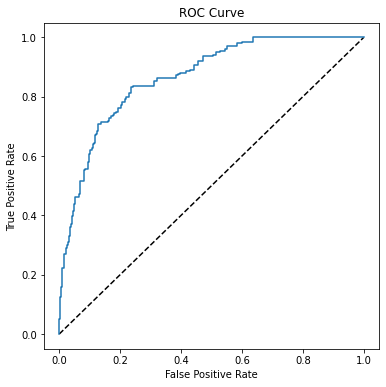

In [27]:
# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [28]:
# Try a different algorithm 

Support Vector Machine algorithms: Algorithms that define a hyperplane that separates classes.
Tree-based algorithms: Algorithms that build a decision tree to reach a prediction
Ensemble algorithms: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.

In [29]:

from sklearn.ensemble import RandomForestClassifier

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline

Confusion Matrix:
 [[395   2]
 [ 19 184]] 

Accuracy: 0.965
Overall Precision: 0.989247311827957
Overall Recall: 0.9064039408866995

AUC: 0.9975369458128079


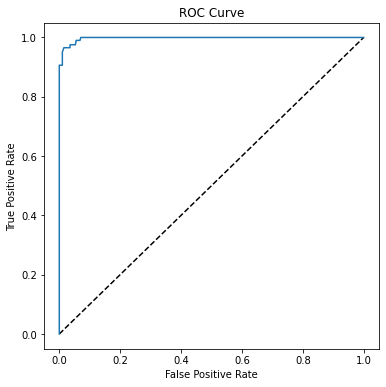

In [30]:
# القاء نظره علي مقاييس الاداء 
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Use the Model for Inferencing
استخدام النموذج للاستدلال
الآن بعد أن أصبح لدينا نموذجًا مدربًا مفيدًا بشكل معقول ، يمكننا حفظه لاستخدامه لاحقًا للتنبؤ بتسميات البيانات الجديدة:


In [35]:
import joblib

# Save the model as a pickle file
filename = 'diabetes_model.pkl'
joblib.dump(model, filename)

# When we have some new observations for which the label is unknown,
# we can load the model and use it to predict values for the unknown label:



['diabetes_model.pkl']

In [36]:
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class is 0


In [37]:
# Multiclass Classification

In [40]:
import pandas as pd

# load the training dataset
penguins = pd.read_csv('penguins.csv')

# Display a random sample of 10 observations
sample = penguins.sample(10)
sample
# (10, 9)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
105,106,Adelie,Biscoe,39.7,18.9,184.0,3550.0,male,2009
287,288,Chinstrap,Dream,51.7,20.3,194.0,3775.0,male,2007
51,52,Adelie,Biscoe,40.1,18.9,188.0,4300.0,male,2008
217,218,Gentoo,Biscoe,49.8,16.8,230.0,5700.0,male,2008
249,250,Gentoo,Biscoe,46.9,14.6,222.0,4875.0,female,2009
10,11,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
100,101,Adelie,Biscoe,35.0,17.9,192.0,3725.0,female,2009
237,238,Gentoo,Biscoe,50.8,17.3,228.0,5600.0,male,2009
151,152,Adelie,Dream,41.5,18.5,201.0,4000.0,male,2009
97,98,Adelie,Dream,40.3,18.5,196.0,4350.0,male,2008


In [43]:
# ما تبقي من الكود هو لمجموعه من البيانات متعدده التصنيف 
# سبق وتدربنا علي هذا النوع كثيرا 
# لذا لن نكمل 
